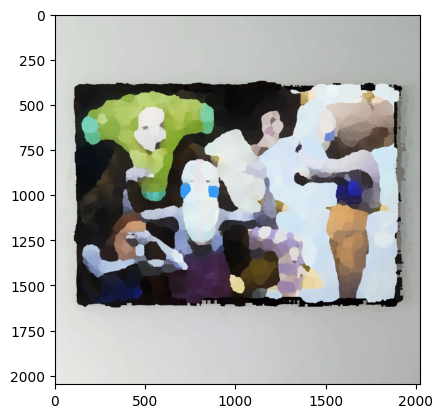

In [15]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('img.jpg')
x = cv2.xphoto.oilPainting(img, 27, 1)
cv2.imwrite('x.png', x)
cv2.imread('x.png')
plt.imshow(x)



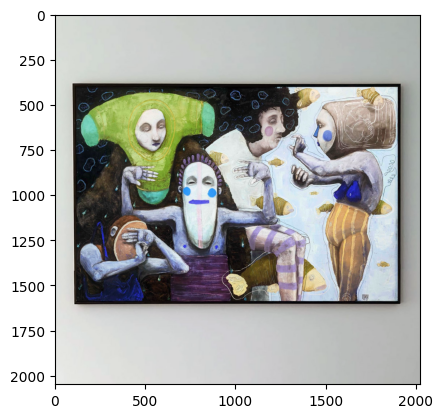

In [12]:
plt.imshow(img)

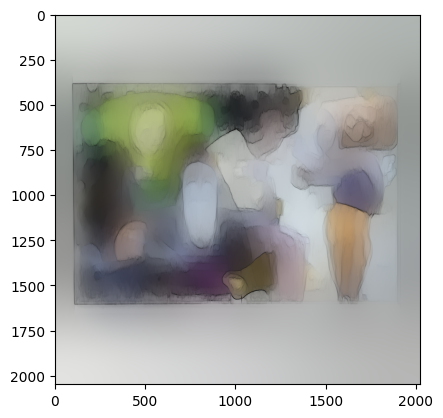

In [20]:
import cv2

res = cv2.stylization(img, sigma_s=160, sigma_r=10.6)
plt.imshow(res)

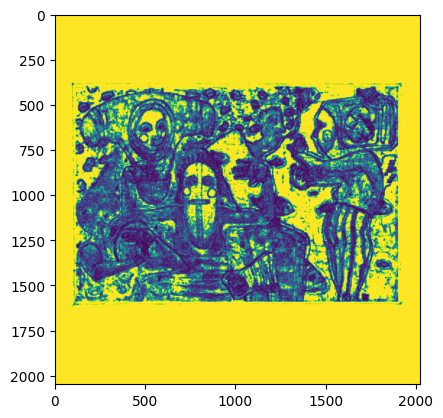

In [25]:
dst_gray, dst_color = cv2.pencilSketch(img, sigma_s=610, sigma_r=0.07, shade_factor=0.05)
plt.imshow(dst_gray)

c:\Users\josef\anaconda3\envs\opencv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


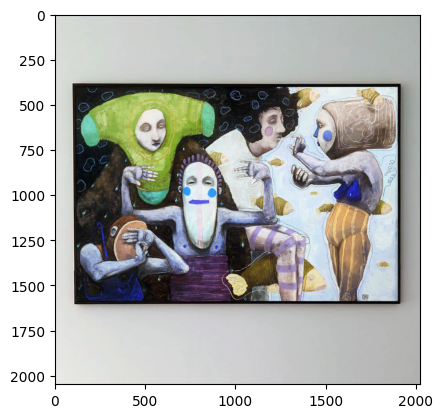

In [27]:
import scipy.spatial
import numpy as np
import random
import cv2
import math
from sklearn.cluster import KMeans
def compute_color_probabilities(pixels, palette):
    distances = scipy.spatial.distance.cdist(pixels, palette)
    maxima = np.amax(distances, axis=1)
    distances = maxima[:, None] - distances
    summ = np.sum(distances, 1)
    distances /= summ[:, None]
    return distances
def get_color_from_prob(probabilities, palette):
    probs = np.argsort(probabilities)
    i = probs[-1]
    return palette[i]
def randomized_grid(h, w, scale):
    assert (scale > 0)
    r = scale//2
    grid = []
    for i in range(0, h, scale):
        for j in range(0, w, scale):
            y = random.randint(-r, r) + i
            x = random.randint(-r, r) + j
    grid.append((y % h, x % w))
    random.shuffle(grid)
    return grid
def get_color_palette(img, n=20):
    clt = KMeans(n_clusters=n)
    clt.fit(img.reshape(-1, 3))
    return clt.cluster_centers_
def complement(colors):
    return 255 - colors
def create_pointillism_art(image_path, primary_colors):
        
    img = cv2.imread(image_path)
    radius_width = int(math.ceil(max(img.shape) / 1000))
    palette = get_color_palette(img, primary_colors)
    complements = complement(palette)
    palette = np.vstack((palette, complements))
    canvas = img.copy()
    grid = randomized_grid(img.shape[0], img.shape[1], scale=3)
    
    pixel_colors = np.array([img[x[0], x[1]] for x in grid])
    
    color_probabilities = compute_color_probabilities(pixel_colors, palette)
    for i, (y, x) in enumerate(grid):
        color = get_color_from_prob(color_probabilities[i], palette)
        cv2.ellipse(canvas, (x, y), (radius_width, radius_width), 0, 0, 360, color, -1, cv2.LINE_AA)
    return canvas
res = create_pointillism_art('img.jpg', 220)
plt.imshow(res)

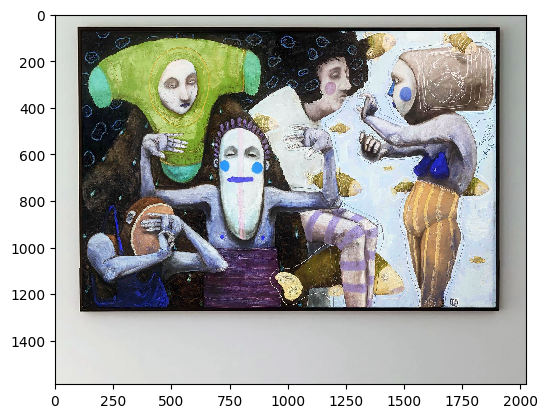

In [36]:
plt.imshow(res[300:-100][30:-30], cmap=plt.cm.gray_r, interpolation="nearest")
#plt.show()

In [37]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
xl = reg.predict([[11, 1.]])
print(xl)

[5.9999994]
